<a href="https://colab.research.google.com/github/mahdiaredraki/DynamicProgramming/blob/main/Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

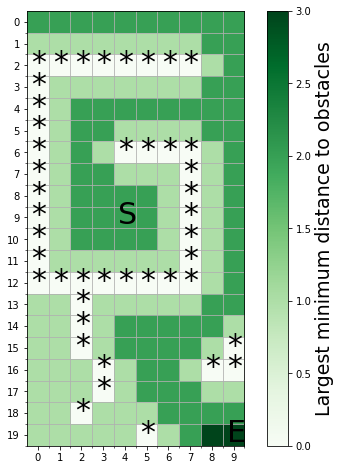

Best Score Possible is: 3
Minimum Distance Possible for this Starting Position is: 2


In [ ]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import time
from IPython.display import clear_output
%matplotlib inline
Start_Time=time.time()

###################################################################################
#                                                                                 #
#                                   USER INPUT                                    #
#                                                                                 #       
###################################################################################

Plot_Updates=1 # =1 if you want to see the recursive algorithm update the scores on a plotted grid, =0 if you want the code to run fast without any plotting

grid=["..........",
      "..........",
      "********..",
      "*.........",
      "*.........",
      "*.........",
      "*...****..",
      "*......*..",
      "*......*..",
      "*...S..*..",
      "*......*..",
      "*......*..",
      "********..",
      "..*.......",
      "..*.......",
      "..*......*",
      "...*....**",
      "...*......",
      "..*.......",
      ".....*...E"]   

###################################################################################
#                                                                                 #
#                               BEGIN FUNCTIONS                                   #
#                                                                                 #       
###################################################################################

def Min_Distance_To_Obstacles(Current_Position,Obstacle_Position, Obstacle_Counter):
    #---- Outputs minimum distance to obstacle from Current_Position ----#
    Min_Distance_Each_Obstacle=[]
    for Current_Obstacle_Index in range(0,Obstacle_Counter):
        Current_Obstacle_Position=Obstacle_Position[Current_Obstacle_Index]
        Distance= abs(Current_Position[0]-Current_Obstacle_Position[0])+abs(Current_Position[1]-Current_Obstacle_Position[1])
        Min_Distance_Each_Obstacle.append(Distance)
        if 0 in Min_Distance_Each_Obstacle:
            ## Makes code more efficient since min possible distance is 0
            return 0
    Minimum_Distance=min(Min_Distance_Each_Obstacle)
    return Minimum_Distance   

def Reward_Function(Grid_Reward,Min_Distance_Current_Position,Next_Position,Min_Distance_Next_Position):
    ## Calculate Reward g(s,a)
    Reward_Next_Position=Grid_Reward[Next_Position[0],Next_Position[1]]
    Estimate_Reward_Current_Position=Min_Distance_Current_Position
    if Reward_Next_Position==0 or Estimate_Reward_Current_Position==0:
        return 0
    if Estimate_Reward_Current_Position==Reward_Next_Position:
        return Reward_Next_Position
    if Reward_Next_Position>Estimate_Reward_Current_Position:
        return Estimate_Reward_Current_Position
    return Reward_Next_Position
        
def Minimum_Distance_Function(grid,Plot_Updates):
    if type(grid) != list: # Check that grid is of type list
        print("Error: Grid must be a list of strings")
        return 0
    if not(all(isinstance(n, str) for n in grid)): # Check that grid is of type string
        print("Error: Grid must only contain strings")
        return 0
    Rows=len(grid)       # Number of Rows
    Columns=len(grid[0]) # Number of Columns
    Obstacle_Position=[]
    Obstacle_Counter=0
    
    ## Set Grid with score 0 as first guess
    Grid_Reward = np.zeros((Rows,Columns))
    Grid_Action = np.zeros((Rows,Columns),dtype=str)
    
    ## Find Index of Start, End, and Obstacles and Count # of Obstacles
    Fake_Position=[-1,-1]
    Start_Position=Fake_Position;    End_Position=Fake_Position
    for Current_Row_Index in range(0,Rows): 
        if len(grid[Current_Row_Index]) != Columns: #Check that length of each row is consistent
            print("Error: Grid must be rectangular")
            return 0
        Current_Row_Value=grid[Current_Row_Index]
        for Current_Column_Index in range(0,Columns):
            Current_Column_Value= Current_Row_Value[Current_Column_Index]
            if Current_Column_Value in "S": # Position of S
                if Start_Position!=Fake_Position:
                    print("Error: Multiple Start positions included in grid")
                    return 0
                Start_Position=[Current_Row_Index,Current_Column_Index]
            elif Current_Column_Value in "E": # Position of E:
                if End_Position!=Fake_Position:
                    print("Error: Multiple End positions included in grid")
                    return 0
                End_Position=[Current_Row_Index,Current_Column_Index]
            elif Current_Column_Value in "*": # Position of Obstacle:
                Obstacle_Position.append([Current_Row_Index,Current_Column_Index])
                Obstacle_Counter+=1
            elif not(Current_Column_Value in "."): 
                print("Error: Grid must only contain S E * or .")
                return 0
    ## Check that there is S E and * in the Grid - If no obstacle RETURN 0?????????????????
    if Start_Position==Fake_Position or End_Position==Fake_Position or Obstacle_Counter==0:
        print("Error: Grid does not contain any obstacles or start or end position")
        return 0    
    
    ## Determine the Best_Score_Possible
    Min_Distance_End_Position= Min_Distance_To_Obstacles(End_Position,Obstacle_Position, Obstacle_Counter)
    Min_Distance_Start_Position= Min_Distance_To_Obstacles(Start_Position,Obstacle_Position, Obstacle_Counter)
    Best_Score_Possible=min([Min_Distance_End_Position,Min_Distance_Start_Position])
    
    ## Loop through recursion at least as many times as distance between start and end
    Distance_Start_To_End=abs(Start_Position[0]-End_Position[0])+abs(Start_Position[1]-End_Position[1])*2
    ## Test all 4 directions from Current_Position to see which has greatest score
    Calculating_Reward_To_Go_From_Start_Position=True
    N_Loops=0 # Keep track of how many times code passes through while loop
    
    while Calculating_Reward_To_Go_From_Start_Position:
        N_Loops+=1
        Previous_Step_Reward_Start_Position=sum([sum(i) for i in Grid_Reward])
        
        ## Loop through entire grid and update Reward recursively
        for Current_Row_Index in range(0,Rows):
            for Current_Column_Index in range(0,Columns):
                Reward_Going_Left= Reward_Going_Right= Reward_Going_Up= Reward_Going_Down=-1
                Min_Distance_Going_Left= Min_Distance_Going_Right= Min_Distance_Going_Up= Min_Distance_Going_Down =-1
                Position_Going_Left= Position_Going_Right= Position_Going_Up= Position_Going_Down= Fake_Position
                Current_Position=[Current_Row_Index,Current_Column_Index]
                Min_Distance_Current_Position= Min_Distance_To_Obstacles(Current_Position,Obstacle_Position, Obstacle_Counter)
                ## Test Going Left
                if not(Current_Position[1]==0): ## check that we are not already on left edge
                    Position_Going_Left=[Current_Position[0],Current_Position[1]-1] 
                    Min_Distance_Going_Left= Min_Distance_To_Obstacles(Position_Going_Left,Obstacle_Position, Obstacle_Counter)
                    Reward_Going_Left=Reward_Function(Grid_Reward,Min_Distance_Current_Position,Position_Going_Left,Min_Distance_Going_Left)
                ## Test Going Right
                if not(Current_Position[1]==Columns-1): ## check that we are not already on right edge
                    Position_Going_Right=[Current_Position[0],Current_Position[1]+1] 
                    Min_Distance_Going_Right= Min_Distance_To_Obstacles(Position_Going_Right,Obstacle_Position, Obstacle_Counter)
                    Reward_Going_Right=Reward_Function(Grid_Reward,Min_Distance_Current_Position,Position_Going_Right,Min_Distance_Going_Right)
                ## Test Going Up
                if not(Current_Position[0]==0): ## check that we are not already on top edge
                    Position_Going_Up=[Current_Position[0]-1,Current_Position[1]] 
                    Min_Distance_Going_Up= Min_Distance_To_Obstacles(Position_Going_Up,Obstacle_Position, Obstacle_Counter)
                    Reward_Going_Up=Reward_Function(Grid_Reward,Min_Distance_Current_Position,Position_Going_Up,Min_Distance_Going_Up)
                ## Test Going Down
                if not(Current_Position[0]==Rows-1): ## check that we are not already on bottom edge
                    Position_Going_Down=[Current_Position[0]+1,Current_Position[1]] 
                    Min_Distance_Going_Down= Min_Distance_To_Obstacles(Position_Going_Down,Obstacle_Position, Obstacle_Counter)
                    Reward_Going_Down=Reward_Function(Grid_Reward,Min_Distance_Current_Position,Position_Going_Down,Min_Distance_Going_Down)
                
                ## If Multiple Equal Best Rewards, Pick one that takes us closer to end point
                Reward_All_Directions=[Reward_Going_Left,Reward_Going_Right,Reward_Going_Up,Reward_Going_Down]
                Position_All_Directions=[Position_Going_Left,Position_Going_Right,Position_Going_Up,Position_Going_Down]
                Indices_Of_Best_Reward=np.argwhere(Reward_All_Directions==np.max(Reward_All_Directions))
                List_Of_Actions=['L','R','U','D']
                Distance_Indices_Of_Best_Reward=[]
                if np.size(Indices_Of_Best_Reward)>1:
                    for i in range (0,np.size(Indices_Of_Best_Reward)):
                        Direction_Index=Indices_Of_Best_Reward[i]
                        Distance_Indices_Of_Best_Reward.append(abs(Position_All_Directions[Direction_Index[0]][0]-End_Position[0])+abs(Position_All_Directions[Direction_Index[0]][1]-End_Position[1]))
                    Better_Choice_Action=np.argmin(Distance_Indices_Of_Best_Reward)
                    Best_Direction_Index=Indices_Of_Best_Reward[Better_Choice_Action]
                    Best_Reward=Reward_All_Directions[Best_Direction_Index.item()]
                    Best_Action=List_Of_Actions[Best_Direction_Index.item()]
                else:    
                    Best_Reward=max(Reward_All_Directions)
                    Index_Best_Action=np.argmax(Reward_All_Directions)
                    Best_Action=List_Of_Actions[Index_Best_Action]
                    
                ## Populate Grid_Reward and Grid_Action with best rewards and actions
                Grid_Reward[Current_Position[0],Current_Position[1]]=Best_Reward
                Grid_Action[Current_Position[0],Current_Position[1]]=Best_Action
                if Current_Position==End_Position: # Make the end position the highest reward
                    Grid_Reward[Current_Position[0],Current_Position[1]]=Best_Score_Possible
        
        ## Plot grid with estimated rewards
        if Plot_Updates==1:
          clear_output()
          fig, ax = plt.subplots()
          fig.set_size_inches(8, 8, forward=True)
          im=ax.imshow(Grid_Reward, cmap="Greens", origin="lower", vmin=0)
          ax.set_xticks(np.arange(Columns))
          ax.set_yticks(np.arange(Rows))
          ax.minorticks_on()
          ax.xaxis.set_minor_locator(AutoMinorLocator(2))
          ax.yaxis.set_minor_locator(AutoMinorLocator(2))
          ax.grid(which="minor")
          ax.invert_yaxis()
          Figure_Offset=0.3
          for i in range(0, Obstacle_Counter):
            ax.text(Obstacle_Position[i][1]-Figure_Offset,Obstacle_Position[i][0]+Figure_Offset,'*',fontsize=30)
          ax.text(Start_Position[1]-Figure_Offset,Start_Position[0]+Figure_Offset,'S',fontsize=30)
          ax.text(End_Position[1]-Figure_Offset,End_Position[0]+Figure_Offset,'E',fontsize=30)
          cb=fig.colorbar(im,ax=ax)
          cb.set_label(label="Largest minimum distance to obstacles",size=19)
          plt.pause(0.5)
          plt.show()

        ## Terminate While Loop
        if Previous_Step_Reward_Start_Position==sum([sum(i) for i in Grid_Reward]) or Grid_Reward[Start_Position[0],Start_Position[1]]==Best_Score_Possible:
            Calculating_Reward_To_Go_From_Start_Position=False
            print("Best Score Possible is: " + str(Best_Score_Possible))
    return int(Grid_Reward[Start_Position[0],Start_Position[1]])

print("Minimum Distance Possible for this Starting Position is: "+str(Minimum_Distance_Function(grid,Plot_Updates)))

if Plot_Updates==0:
  Elapsed_Time=time.time()-Start_Time
  print("Completion time: "+str(round(Elapsed_Time,3))+ " seconds")